<a href="https://colab.research.google.com/github/shivasrinivasaraopinnamaneni/info5731-fall2021/blob/main/In_class_exercise_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (9/15/2021, 40 points in total)

The purpose of this exercise is to understand users' information needs, then collect data from different sources for analysis.

Question 1 (10 points): Describe an interesting research question (or practical question) you have in mind, what kind of data should be collected to answer the question(s)? How many data needed for the analysis? The detail steps for collecting and save the data. 

In [13]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
I am thinking on a research based on media platforms , which is user recommendations to what to watch next and upcoming genres
It requires several metrics data into consideration, like age, previously watched shows, most-watched genre, watch frequency, and feeds them into a Data analytics which then generates what the user might wish to watch next. 
Based on your preference and input file in the search bars, Here take less data from user watch history. This data is stored in SQLdatabase,
 we will attempt to build either a content-based recommendation or a collaborative filtering recommendation system.
 For this research project, we will require knowledge of R and Python with the datasets, Algorithms etc.


'''

'\nPlease write you answer here:\nI am thinking on a research based on media platforms , which is user recommendations to what to watch next and upcoming genres\nIt requires several metrics data into consideration, like age, previously watched shows, most-watched genre, watch frequency, and feeds them into a Data analytics which then generates what the user might wish to watch next. \nBased on your preference and input file in the search bars, Here take less data from user watch history. This data is stored in SQLdatabase,\n we will attempt to build either a content-based recommendation or a collaborative filtering recommendation system.\n For this research project, we will require knowledge of R and Python with the datasets, Algorithms etc.\n\n\n'

Question 2 (10 points): Write python code to collect 1000 reviews of a movie from IMDB (https://www.imdb.com/) or 1000 reviews of a product from Amazon (https://www.amazon.com/).

As for the IMDB movie review, the following informtion need to be collected (for example: https://www.imdb.com/title/tt6751668/reviews?ref_=tt_urv):

(1) User name

(2) Star

(3) Review title

(4) Review text

(5) Review posted time


As for the Amazon product review, the following information need to be collected (for example: https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_3?crid=2E3C55VKJX0K3&dchild=1&keywords=machine+learning+andrew+ng&qid=1631718619&sr=8-3):

(1) User name

(2) Star

(3) Review title

(4) Review text

(5) Review posted time

In [16]:
import pandas as pd

import requests
from bs4 import BeautifulSoup

search_query="iphone+12"
base_url="https://www.amazon.com/s?k="

url=base_url+search_query

header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36','referer':'https://www.amazon.com/Go-Run-Consistent-Performance-Running/dp/B07YQPFBWT/ref=sr_1_7?dchild=1&keywords=skechers&qid=1632111004&sr=8-7'}

search_response=requests.get(url,headers=header)

cookie={} # insert request cookies within{}
cookie = search_response.cookies
product_names=[]
response=getAmazonSearch('iphone+12')
soup=BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}): # the tag which is common for all the names of products
    product_names.append(i.text) #adding the product names to the list



https://www.amazon.com/s?k=iphone+12


In [14]:
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [19]:
def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [20]:
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [12]:
data_asin=[]
response=getAmazonSearch('sketchers+shoes+men')
soup=BeautifulSoup(response.content)
# print(soup.prettify())
for i in soup.findAll("div",class_="sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 AdHolder sg-col sg-col-4-of-20"):
#     print('HI')
    data_asin.append(i['data-asin'])


https://www.amazon.com/s?k=sketchers+shoes+men


In [21]:
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/dp/B08G27R2Q8
https://www.amazon.com/dp/B07YFGVH25
https://www.amazon.com/dp/B097835Q9N
https://www.amazon.com/dp/B08FJ7CZ39
https://www.amazon.com/dp/B098JT9RNX
https://www.amazon.com/dp/B005UF9QDM
https://www.amazon.com/dp/B08G272T1B
https://www.amazon.com/dp/B096881MNQ
https://www.amazon.com/dp/B08S34YZ1J
https://www.amazon.com/dp/B07RRWF4L5
https://www.amazon.com/dp/B095WLLY8S
https://www.amazon.com/dp/B08QS4ZFTV


In [ ]:
reviews=[]
review_title = []
review_date = []
review_star = []
name = []
for j in range(len(link)):
    for k in range(50):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)
        for i in soup.findAll("span",{'data-hook':"review-title"}):
            review_title.append(i.text)
        for i in soup.findAll("span",{'data-hook':"review-date"}):
            review_date.append(i.text)
        for i in soup.findAll("span",{'data-hook':"review-star-rating"}):
            review_star.append(i.text)
        for i in soup.findAll('span',class_='a-profile-name'):
            name.append(i.text)

https://www.amazon.com/Concept-Skechers-Eakins-Lace-up-Sneaker/product-reviews/B07YFG47BK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Concept-Skechers-Eakins-Lace-up-Sneaker/product-reviews/B07YFG47BK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Concept-Skechers-Eakins-Lace-up-Sneaker/product-reviews/B07YFG47BK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Concept-Skechers-Eakins-Lace-up-Sneaker/product-reviews/B07YFG47BK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Concept-Skechers-Eakins-Lace-up-Sneaker/product-reviews/B07YFG47BK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Concept-Skechers-Eakins-Lace-up-Sneaker/product-reviews/B07YFG47BK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amaz

In [9]:
rev={'reviews':reviews}
rev_tit = {'reviews_title':review_title}
rev_dat = {'review_date':review_date}
rev_st = {'review_star':review_star}
rev_name = {'name':name}

In [10]:
review_data=pd.DataFrame.from_dict(rev)
review_title_df = pd.DataFrame.from_dict(rev_tit)
review_date_df = pd.DataFrame.from_dict(rev_dat)
review_star_df = pd.DataFrame.from_dict(rev_st)
review_name_df = pd.DataFrame.from_dict(rev_name)
pd.set_option('max_colwidth',800)

In [11]:
review_data.head(5)

,reviews
0,\n\n I really like this shoe. I've used it mostly for everyday walking and it's quite comfortable. It will look a little big because its white (I got the white color) but the shoe is pretty sporty. The material is not abrasive so it should feel comfortable.\n\n
1,\n\n Those sneakers are the boomLooking greatTo many good compliments from people\n\n
2,"\n\n First, I have never received so many compliments on a pair of shoes. However, within 12 weeks, the souls came off the shoes, lace holes broke, and lettering rubbed off. Plus, I swear they shrank a full size.everyday I do 60 minutes of cardio and 60 minutes of weights. And in my 43 years I have purchased around 500 pairs of Nike. So, I was searching Amazon for new potential Nike’s, and I saw these generic knock-offs.The funny joke was going to be telling a friend, who is really into collectors shoes, that a I went to Kanye West’s church service, and I got some special pair of Yeezy shoes for getting baptized.However, these are actually a very comfortable walking shoe. Built to a degree of quality, and fit like my current Nike walkers.The cushioning is not there to run more a few..."
3,"\n\n Igual a la foto muy lindos en verdad , a mi hijo le encantaron, solo recomiendo pedir 1 número menos pues quedan un poco grandes , excelentes para el precio, no pensé que fueran de tan buena calidad..\n\n"
4,"\n\n I am flat footed and have had as far back as I can remember. Buying shoes that have the durability and comfort I need to get through the day has been a huge hit & miss and/or rolling of the dice because for all the $100.00+ shoes I have bought throughout the years I can count with one hand regarding the overall comfortably of the shoes where more so a knock off verses a name brand like Nike, Adidas, etc., etc.This pair of shoes where unlike any pair I’ve bought to date regarding the overall condition and comfort. The only thing that I am having to do is exchanging the pair I recently ordered only because there was a reddish or black spot of sorts on the right shoe. I am having no problems whatsoever thus far and normally I probably wouldn’t even be exchanging but I want these sho..."


In [ ]:
review_title_df.head()

,reviews_title
0,Best looking shoe I have seen in a long time! Buy a 1/2 size bigger though!
1,Too narrow
2,Best looking shoe I have seen in a long time! Buy a 1/2 size bigger though!
3,Too narrow
4,Best looking shoe I have seen in a long time! Buy a 1/2 size bigger though!


In [ ]:
review_date_df.head()

,review_date
0,"Reviewed in the United States on November 6, 2020"
1,"Reviewed in the United States on July 16, 2020"
2,"Reviewed in the United States on December 22, 2020"
3,"Reviewed in the United States on November 10, 2020"
4,"Reviewed in the United States on December 18, 2020"


In [ ]:
review_name_df.head()

,name
0,\\/(()(()||))(()(()
1,milo
2,\\/(()(()||))(()(()
3,Julymorning
4,RT


Question 3 (10 points): Write python code to collect 1000 articles from Google Scholar (https://scholar.google.com/), Microsoft Academic (https://academic.microsoft.com/home), or CiteSeerX (https://citeseerx.ist.psu.edu/index), or Semantic Scholar (https://www.semanticscholar.org/). 

The following information of the article needs to be collected:

(1) Title

(2) Venue/journal/conference being published

(3) Year

(4) Authors

(5) Abstract

b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <title>Semantic Scholar | AI-Powered Research Tool</title>\n    <meta name="robots" content="noarchive">\n    <!-- We have a public API for this page. Check out http://www.semanticscholar.org/product/api -->\n    <link rel="canonical" href="https://www.semanticscholar.org/">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n    <meta charset="utf-8">\n    <meta name="s2-ui-version" content="c6301e65163095a58cbccc5e9cec6616691613bb">\n    <meta name="description" content="Semantic Scholar uses groundbreaking AI and engineering to understand the semantics of scientific literature to help Scholars discover relevant research.">\n    <meta name="twitter:description" content="Semantic Scholar uses groundbreaking AI and engineering to understand the semantics of scientific literature to help Scholars discover relevant research.">\n\t<meta property="og:description" content="Semantic Scholar uses groundbreaking AI and en
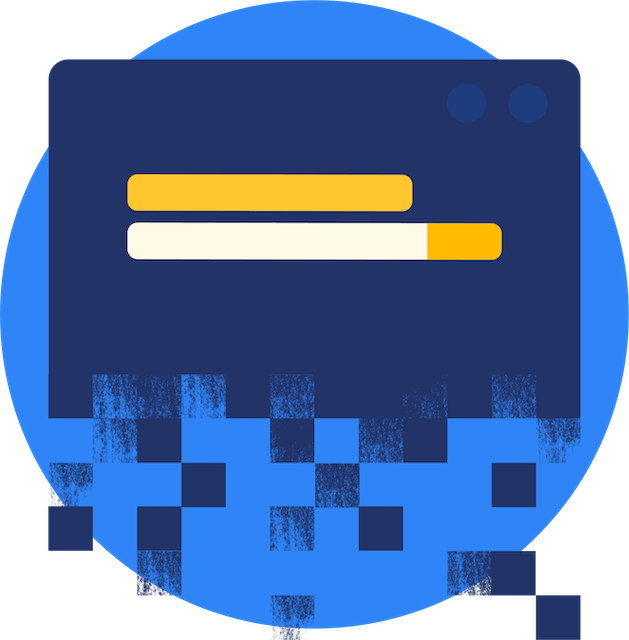
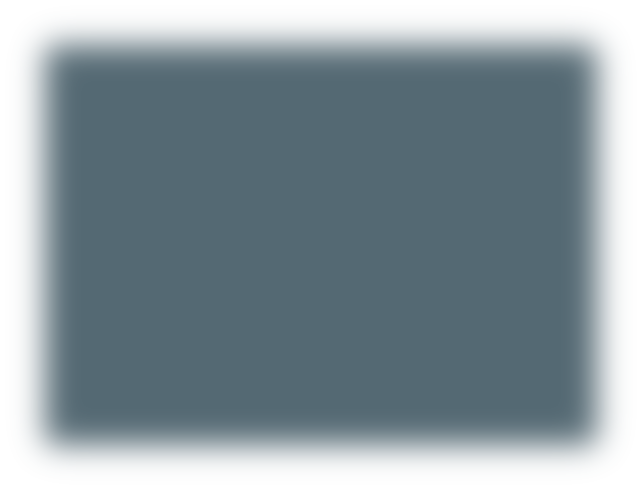
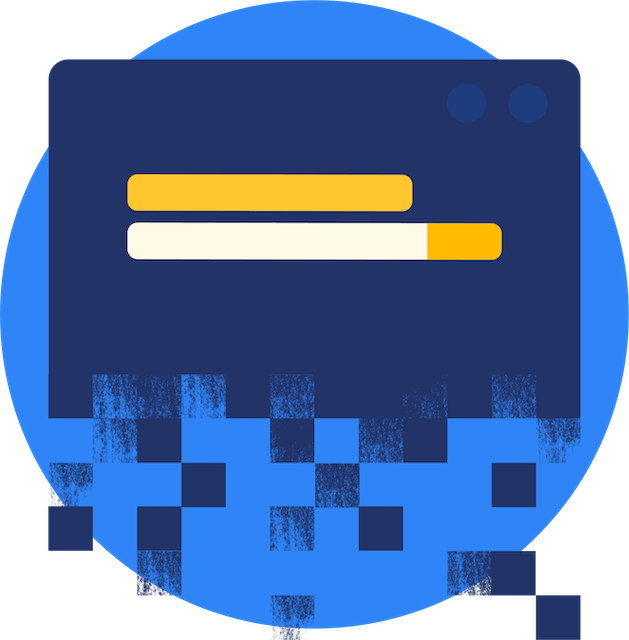
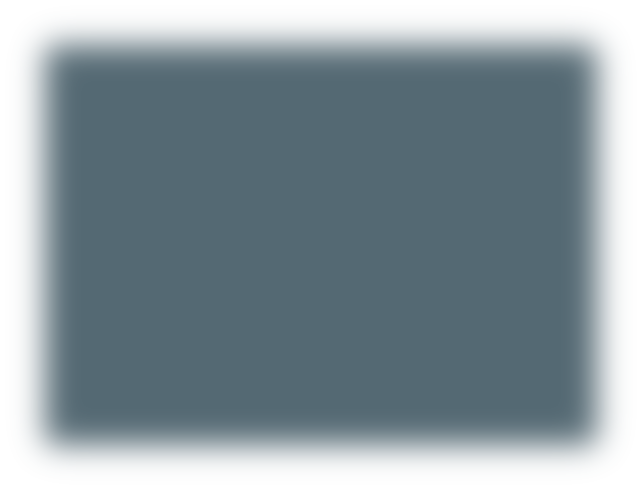
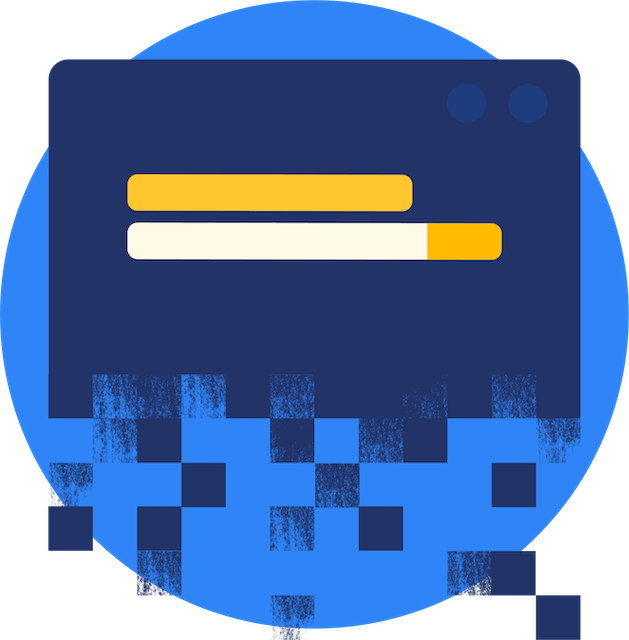
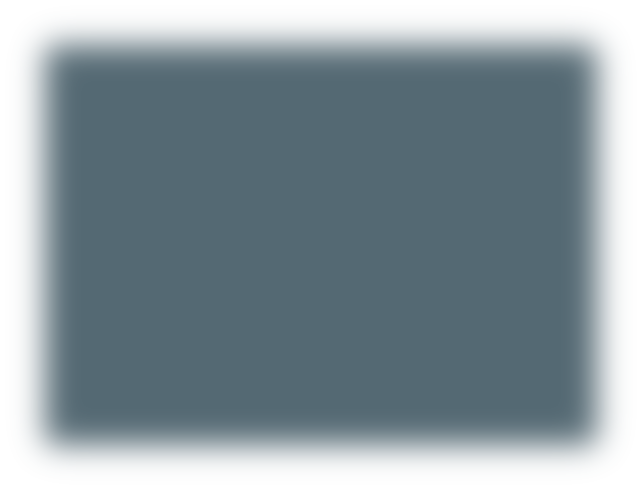
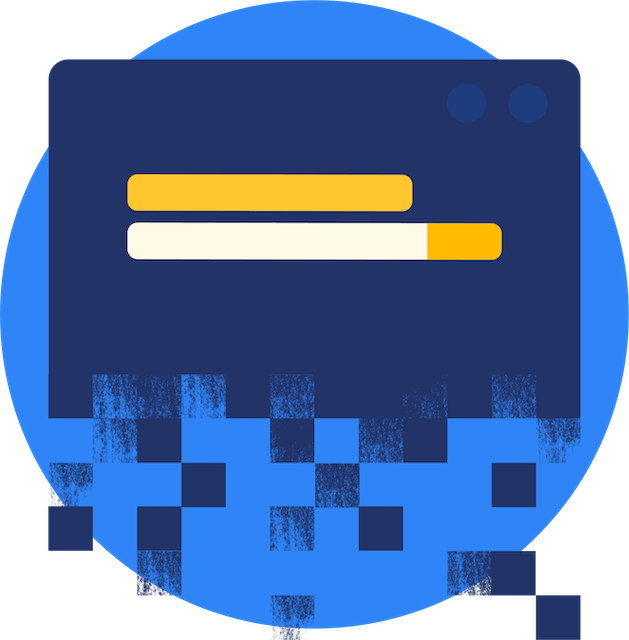
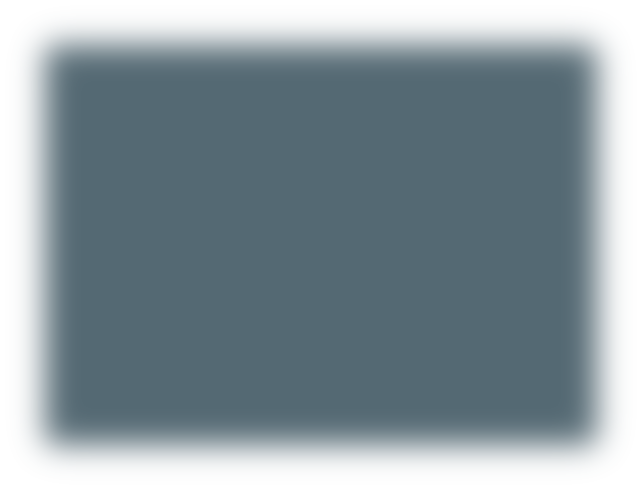
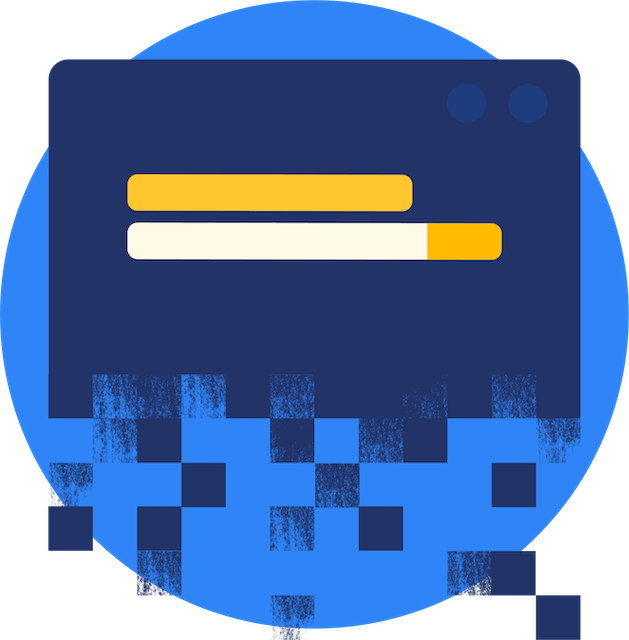
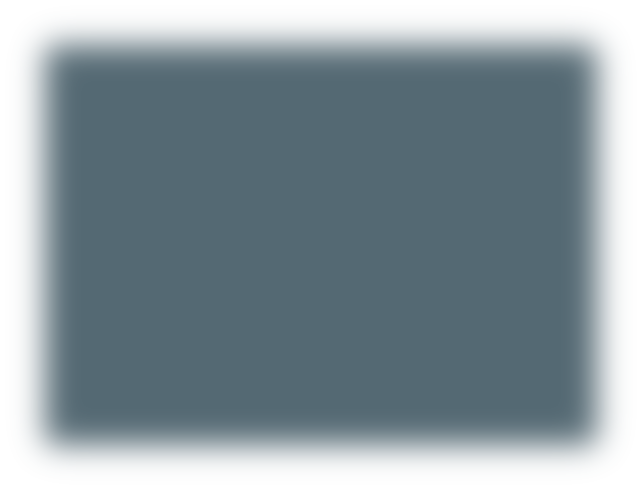
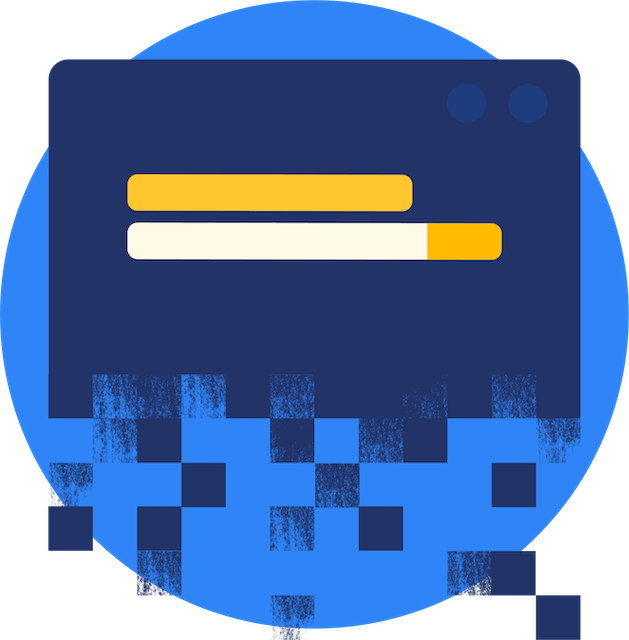
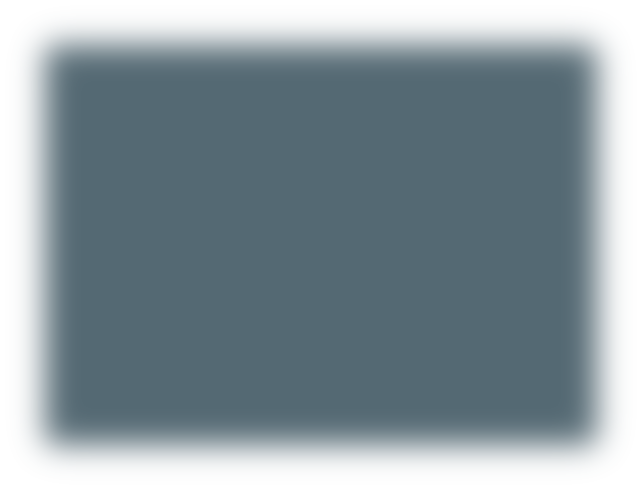
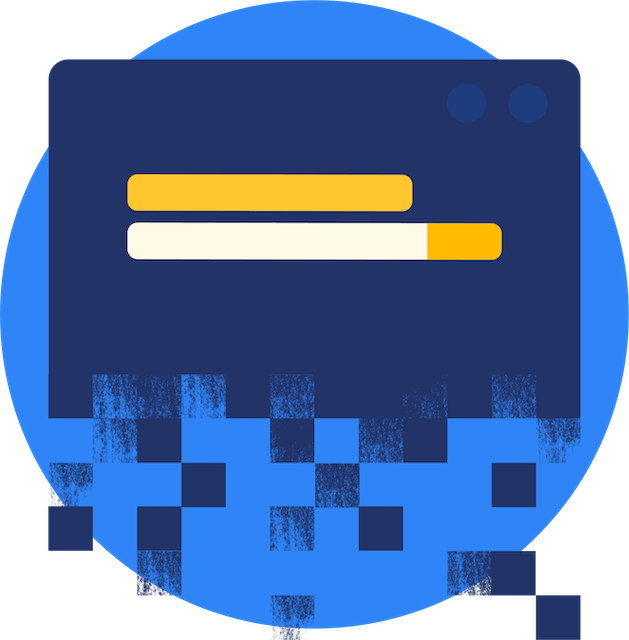
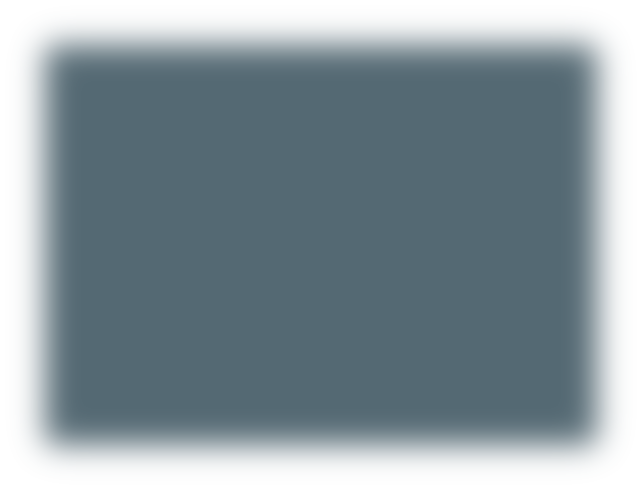
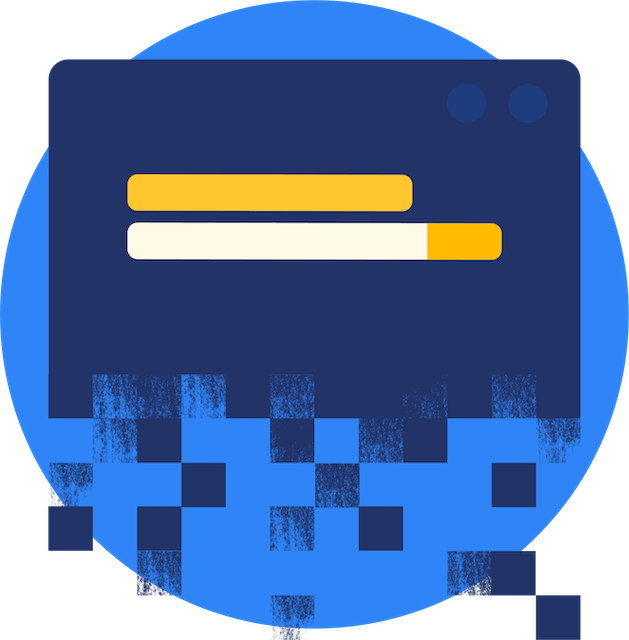
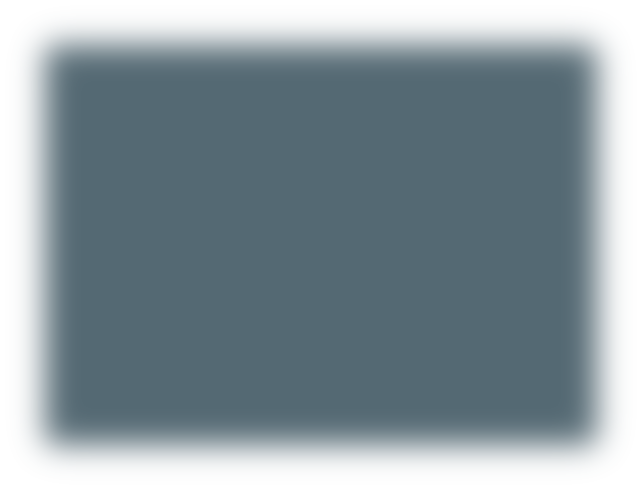
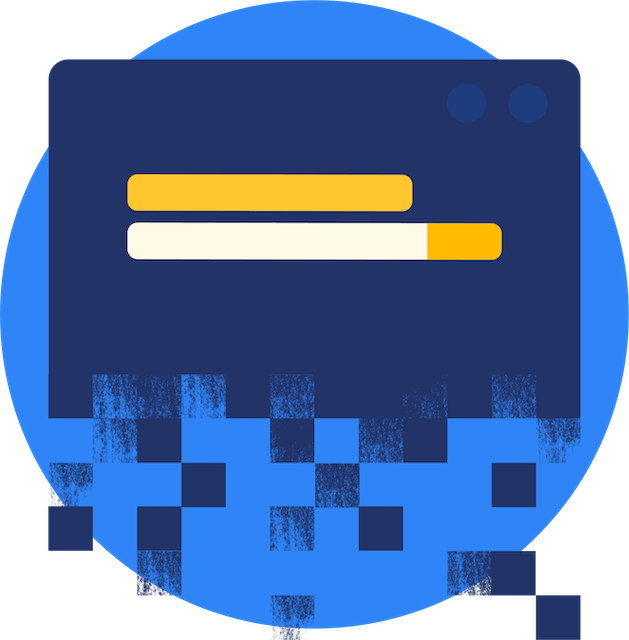
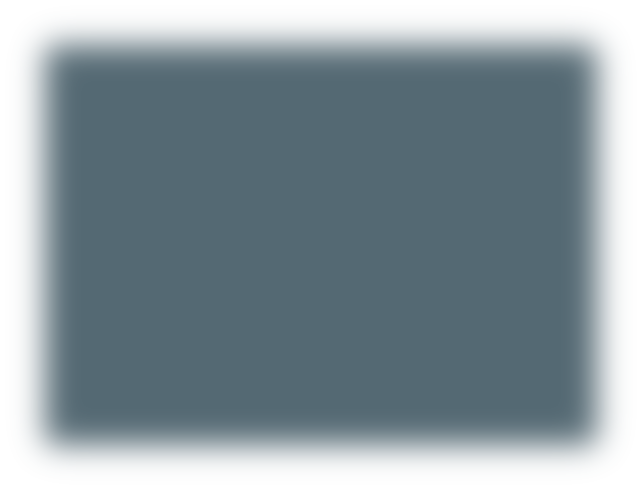
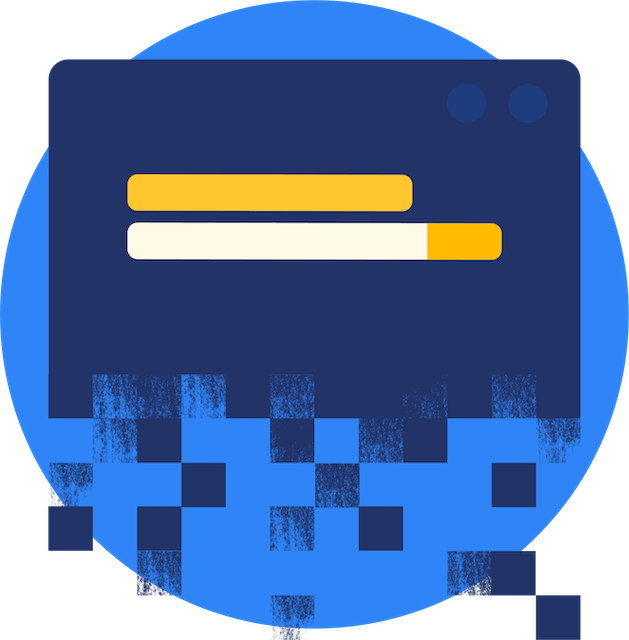
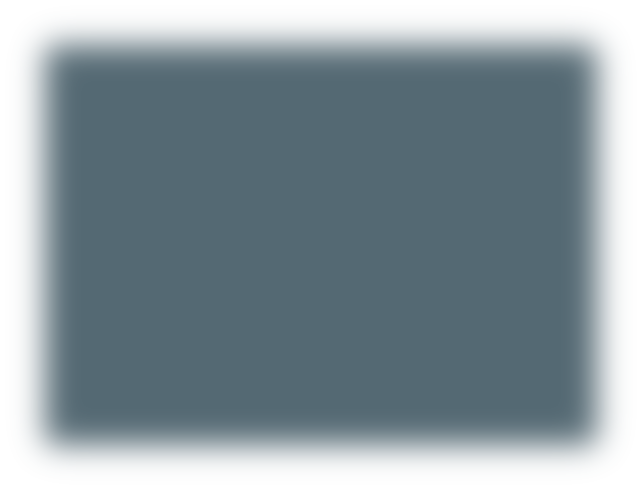
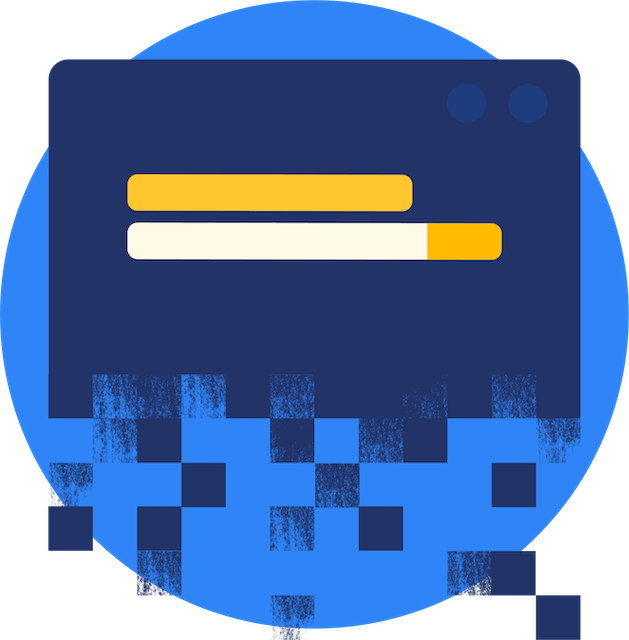
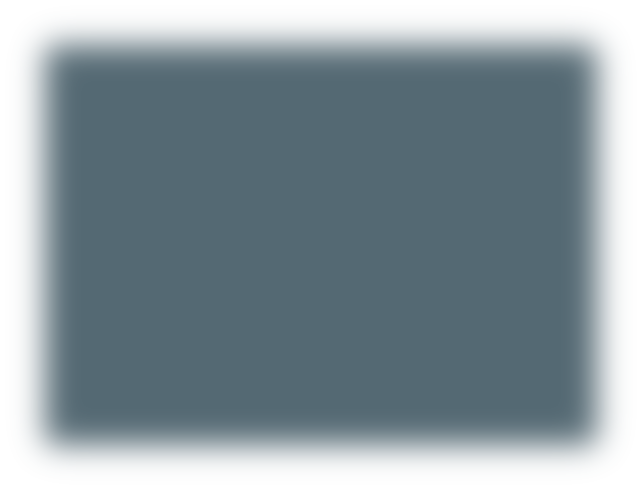
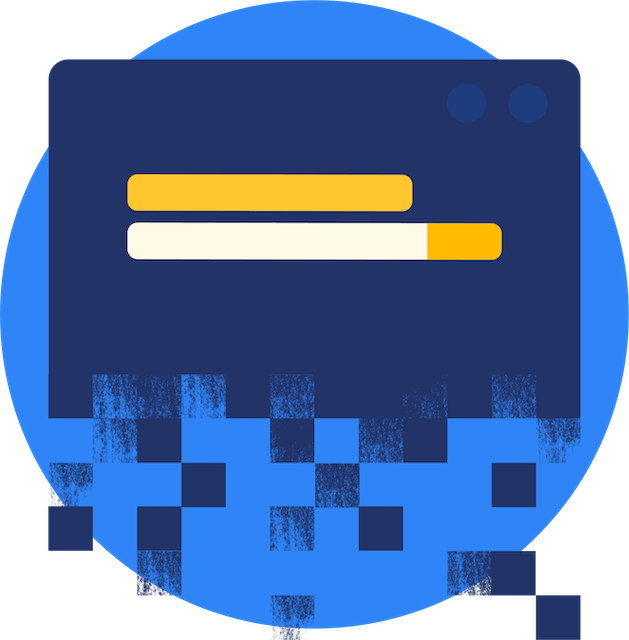
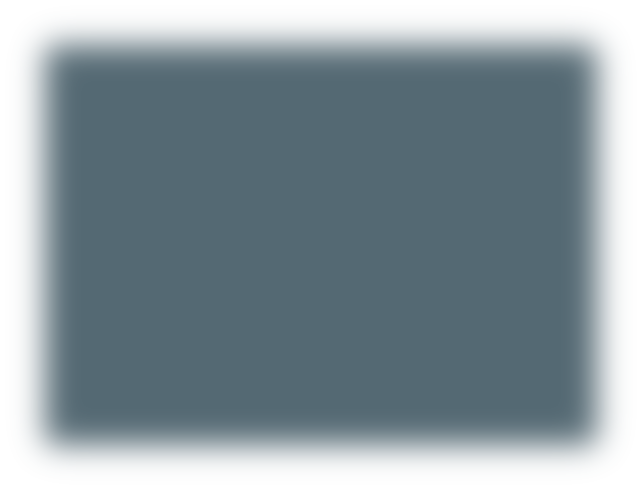
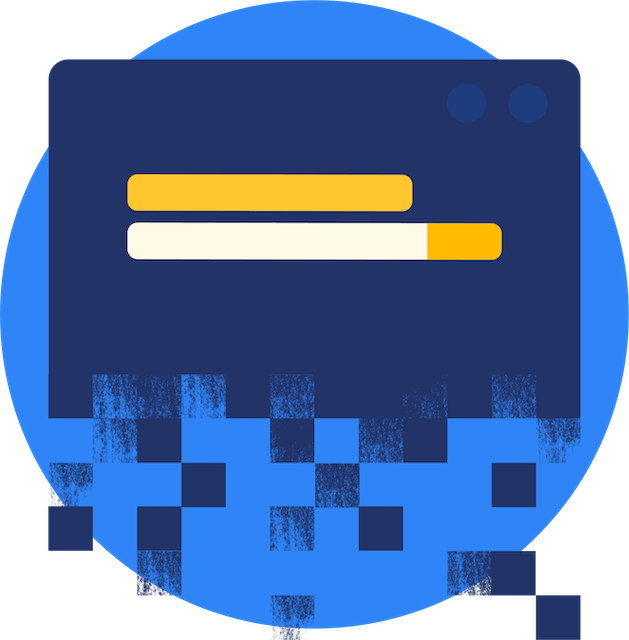
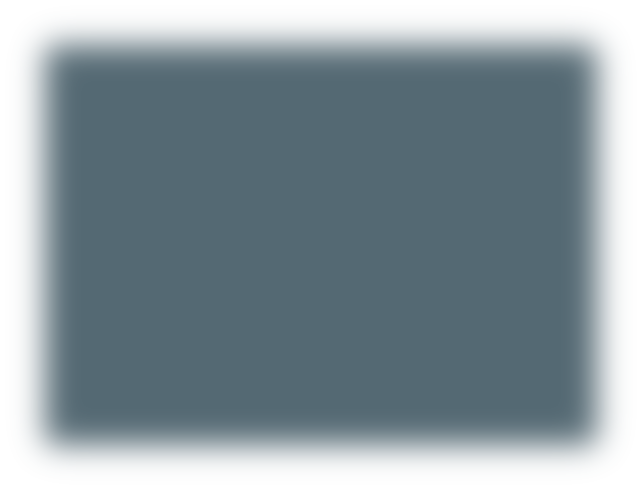
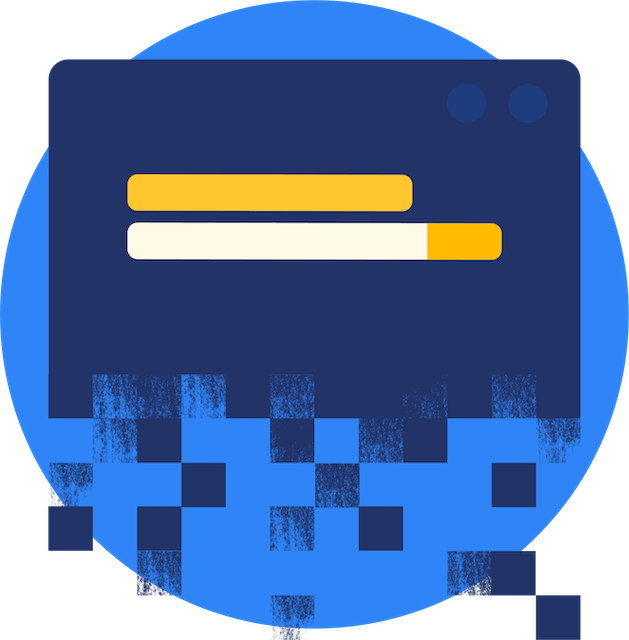
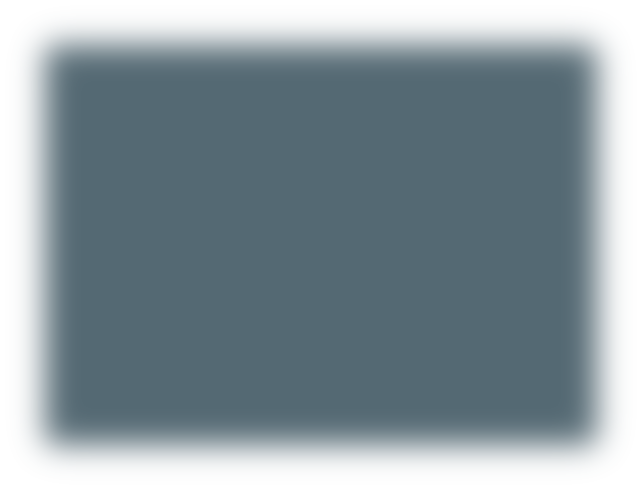
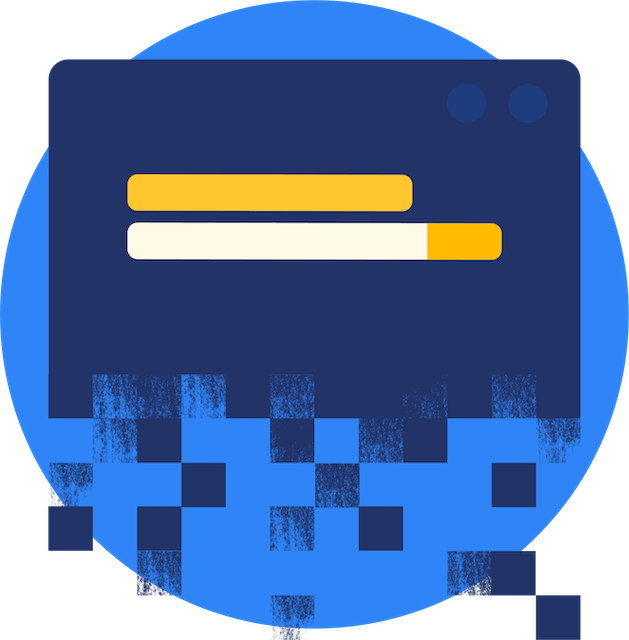
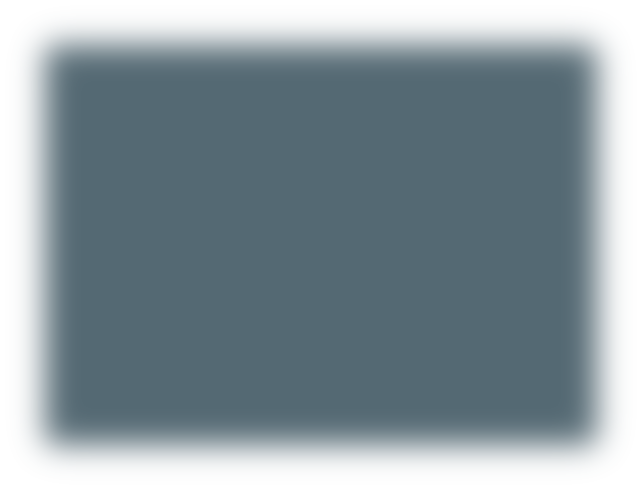
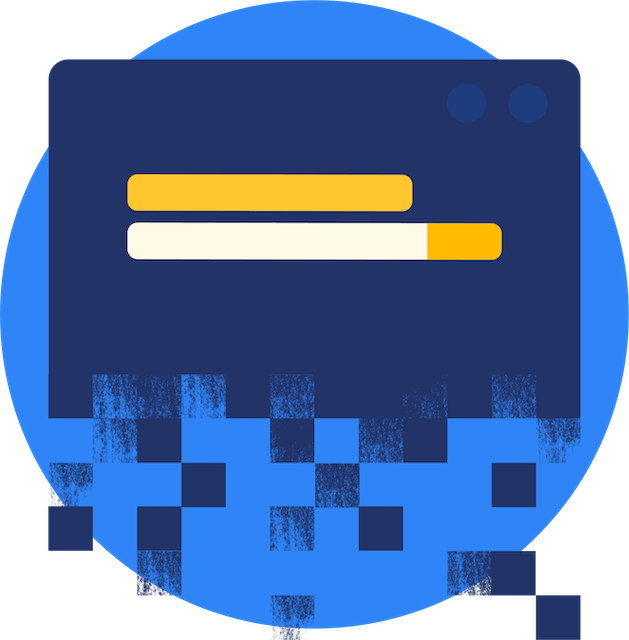
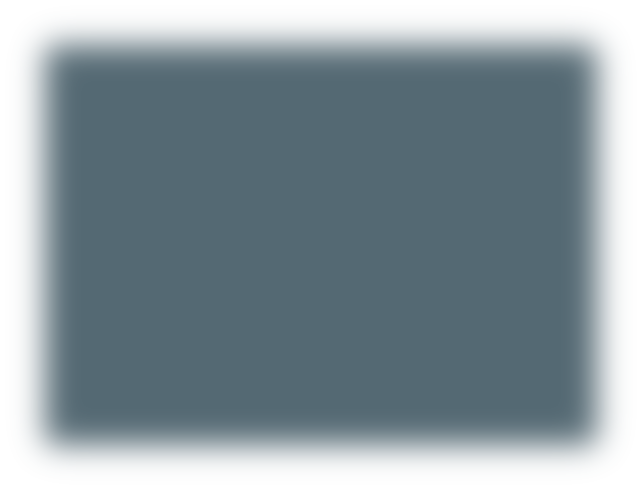
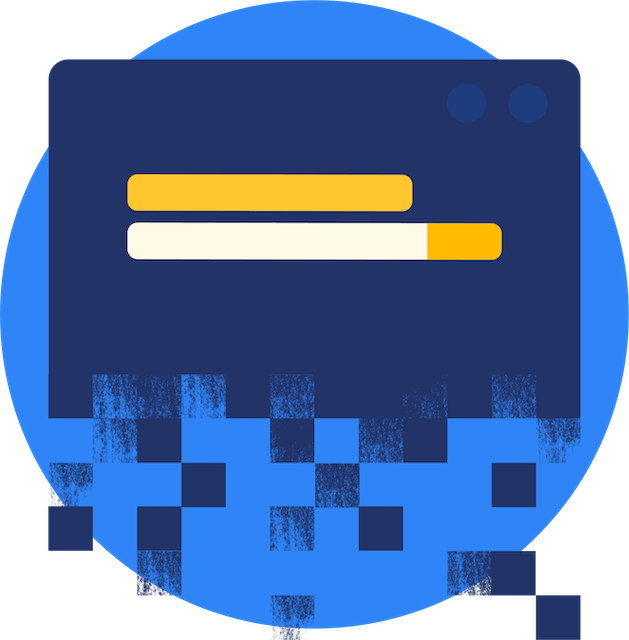
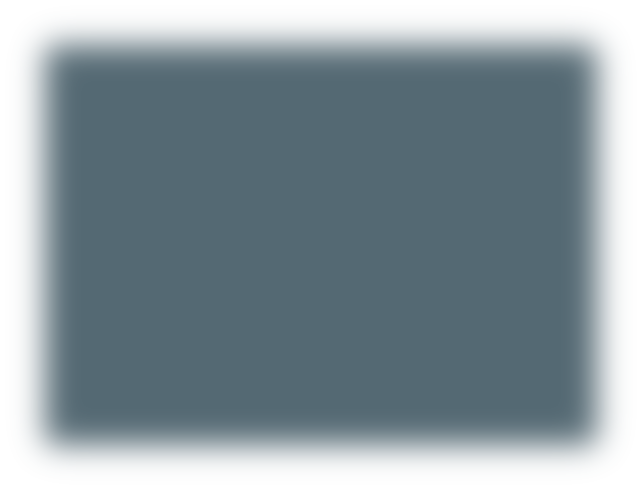
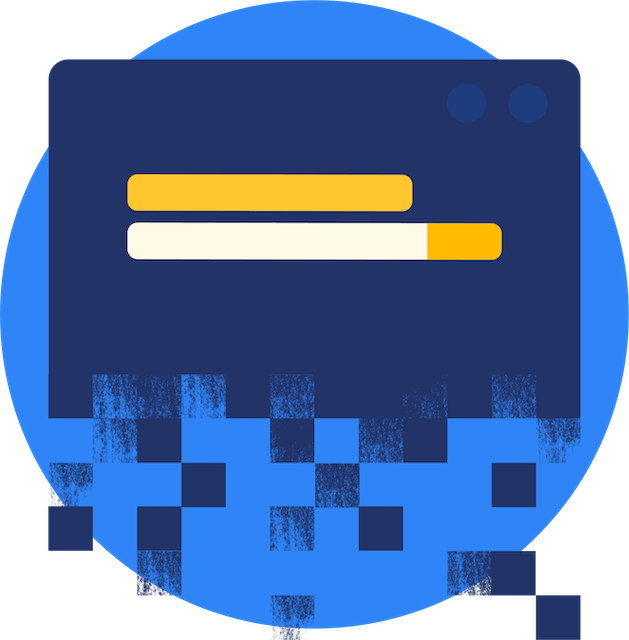
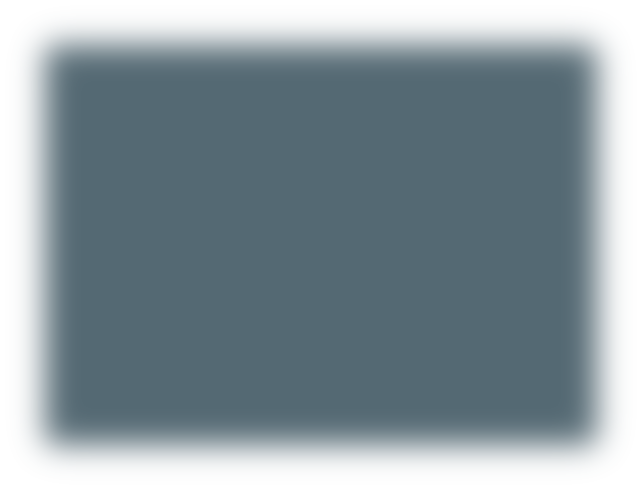
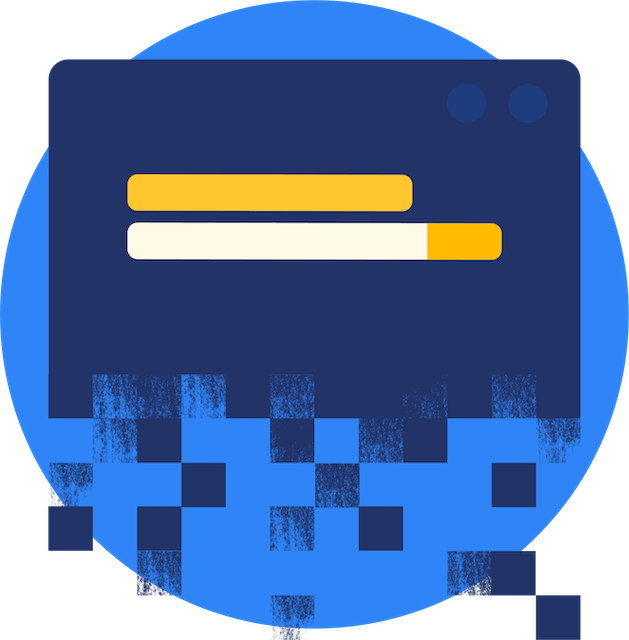
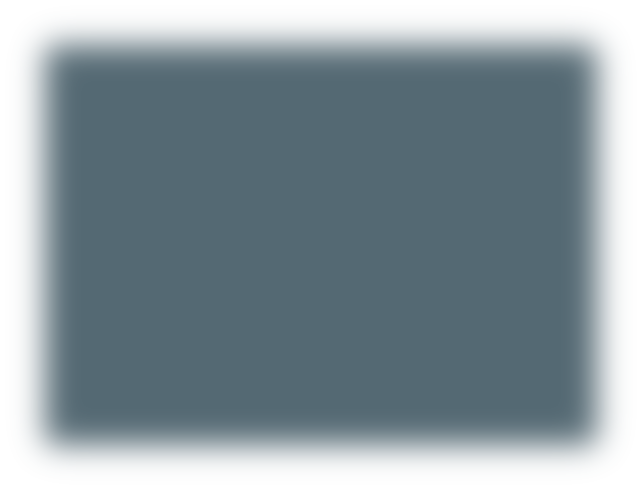
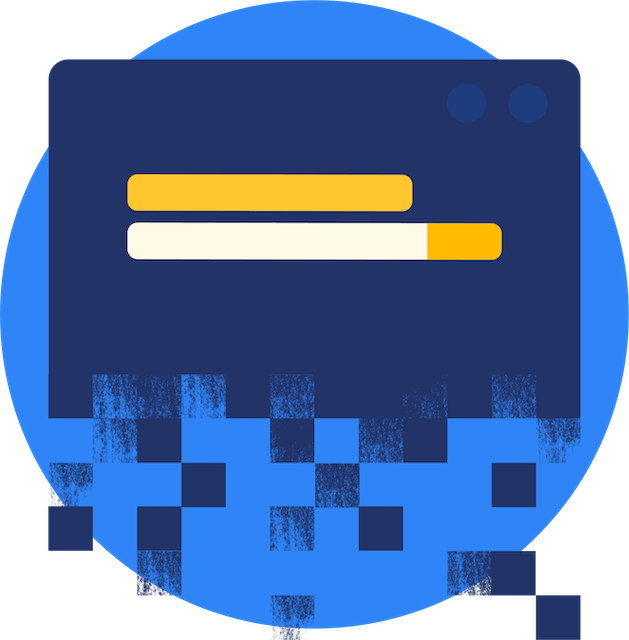
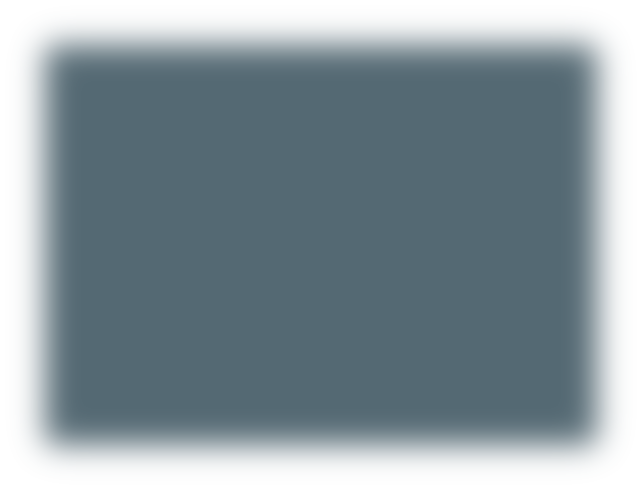

In [24]:
# import the following libraries
import requests
from bs4 import BeautifulSoup
import json
import sys

query="Web Scrapping"
N = 20
pretty = True

class semanticscholar(object):
#define init

    def __init__(self, query, N, pretty):
        self.query = query
        self.semantic_scholar_url = "https://www.semanticscholar.org/"
        self.url = self.semantic_scholar_url+"?q="+query.replace(' ', '+')
        self.N = N,
        self.pretty = pretty

    def getContent(self, i):
        r = requests.get(self.url+'&start='+str(i*10))
        content = r.content
        file = open("output.html", 'wb')
        file.write(content)
        file.close()
        return content
#define gettitle
    def getTitle(self, paper):
        title = paper.find('h3', {'class': 'gs_rt'})
        #print title.text
        try:
            return title.text
        except Exception as e:
            return ""
#define getURL
    def getURL(self, paper):
        url = paper.find('h3', {'class': 'gs_rt'})
        #print url.a.get('href')
        try:
            return url.a.get('href')
        except Exception as e:
            return ""
#define get authors
    def getAuthors(self, paper):
        authors = paper.find('div', {'class': 'gs_a'})
        #print authors.text
        try:
            return authors.text
        except Exception as e:
            return ""
#define get
    def getAbstract(self, paper):
        abstract = paper.find('div', {'class': 'gs_rs'})
        #print abstract.text
        try:
            return abstract.text
        except Exception as e:
            return ""

    def getCited(self, paper):
        cited = paper.find('div', {'class': 'gs_fl'})
        cited = str(cited.text).replace('Cited by ', "").split(' ')[0]
        
        try:
            return cited
        except Exception as e:
            return ""
#define main
    def main(self):
        papersList = list()
        for i in range(int(N)):
            content = self.getContent(i)
            print(content)
            soup = BeautifulSoup(content,features="lxml")
            papers = soup.find_all('div', {'class' : 'gs_ri'})
            print(papers)
            for paper in papers:
                paperDict = dict()
                paper = BeautifulSoup(str(paper))
                paperDict['title'] = self.getTitle(paper)
                paperDict['url'] = self.getURL(paper)
                paperDict['authors'] = self.getAuthors(paper)
                paperDict['abstract'] = self.getAbstract(paper)
                paperDict['cited'] = self.getCited(paper)
                papersList.append(paperDict)
        trues = ['true', '1', 1, 'True', 'TRUE']
        if(pretty in trues):
            print( json.dumps(papersList, indent=4, separators=(',', ': ')))
        else:
            print (json.dumps(papersList))
            

scholar = semanticscholar(query, N, pretty)
scholar.main()

Question 4 (10 points): Write python code to collect 1000 posts from Twitter, or Facebook, or Instagram. You can either use hashtags, keywords, user_name, user_id, or other information to collect the data. 

The following information needs to be collected:

(1) User_name

(2) Posted time

(3) Text 

In [ ]:
# You code here (Please add comments in the code):
import os
import tweepy as tw
import pandas as pd
